<a href="https://colab.research.google.com/github/oroobyaseen/coursera.exercises/blob/gh-pages/VGG16_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [228, 228]

train_path = '/content/drive/MyDrive/Lec/Train'
valid_path = '/content/drive/MyDrive/Lec/Val'

In [5]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [6]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Lec/Train/*')

In [8]:
folders

['/content/drive/MyDrive/Lec/Train/Glioma',
 '/content/drive/MyDrive/Lec/Train/Pituitary tumor',
 '/content/drive/MyDrive/Lec/Train/Meningioma']

In [9]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [10]:
len(folders)

3

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [12]:

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 228, 228, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 228, 228, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 228, 228, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 114, 114, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 114, 114, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 114, 114, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 57, 57, 128)       0     

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=20,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                shear_range=0.5,
                                zoom_range=(0.9, 1.1),
                                horizontal_flip=False,
                                vertical_flip=False,
                                fill_mode='constant',
                                cval=0,
                                validation_split=0.25   
                                   )

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Lec/Train',
                                                 target_size = (228, 228),
                                                 batch_size = 128,
                                                 seed=42,
                                                 shuffle=True,
                                                 class_mode = 'categorical')

Found 2456 images belonging to 3 classes.


In [16]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Lec/Val',
                                            target_size = (228, 228),
                                            batch_size = 128,
                                            seed=42,
                                            shuffle=True,
                                            class_mode = 'categorical')

Found 616 images belonging to 3 classes.


In [17]:
#@title Default title text
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,

)

Epoch 1/20
20/20 [==============================] - 927s 46s/step - loss: 1.3458 - accuracy: 0.5700 - val_loss: 0.4598 - val_accuracy: 0.7971
Epoch 2/20
20/20 [==============================] - 42s 2s/step - loss: 0.4844 - accuracy: 0.7907 - val_loss: 0.3880 - val_accuracy: 0.8279
Epoch 3/20
20/20 [==============================] - 42s 2s/step - loss: 0.3766 - accuracy: 0.8432 - val_loss: 0.3655 - val_accuracy: 0.8263
Epoch 4/20
20/20 [==============================] - 42s 2s/step - loss: 0.3208 - accuracy: 0.8673 - val_loss: 0.3235 - val_accuracy: 0.8474
Epoch 5/20
20/20 [==============================] - 41s 2s/step - loss: 0.2793 - accuracy: 0.8921 - val_loss: 0.2749 - val_accuracy: 0.8880
Epoch 6/20
20/20 [==============================] - 42s 2s/step - loss: 0.2652 - accuracy: 0.9007 - val_loss: 0.2869 - val_accuracy: 0.8685
Epoch 7/20
20/20 [==============================] - 42s 2s/step - loss: 0.2499 - accuracy: 0.9031 - val_loss: 0.2526 - val_accuracy: 0.8880
Epoch 8/20
20/20 [

In [ ]:
import matplotlib.pyplot as plt

In [18]:
test_loss, test_acc = model.evaluate(test_set, steps=len(test_set), verbose=1)
print('Loss: %.3f' % (test_loss * 100.0))
print('Accuracy: %.3f' % (test_acc * 100.0)) 

5/5 [==============================] - 4s 691ms/step - loss: 0.2458 - accuracy: 0.8945
Loss: 24.577
Accuracy: 89.448


In [19]:
training_accuracy_cn      = r.history['accuracy'][-1]
training_loss_cn          = r.history['loss'][-1]
validation_accuracy_cn    = r.history['val_accuracy'][-1]
validation_loss_cn        = r.history['val_loss'][-1]
print("Training Accuracy VGG16    :", training_accuracy_cn )
print("Training Loss VGG16       :", training_loss_cn)
print("Validation Accuracy VGG16 :", validation_accuracy_cn)
print("Validation Loss VGG16      :", validation_loss_cn)

Training Accuracy VGG16    : 0.9556189179420471
Training Loss VGG16       : 0.13818901777267456
Validation Accuracy VGG16 : 0.8944805264472961
Validation Loss VGG16      : 0.24577485024929047


In [25]:
from sklearn.metrics import classification_report

In [28]:
# Generating Confusion Matrix and Classification Report
predictions = np.argmax(model.predict(test_set),axis=1)
labels = test_set.classes
print('Confusion Matrix')
conf_matrix_cn = confusion_matrix(test_set.classes, predictions)
cm_cn = np.array2string(conf_matrix_cn)
print(conf_matrix_cn)
print("=============================================================================================")
print('Classification Report')
# target_names = ['n0','n1','n2','n3','n4','n5','n6','n7','n8','n9']
class_rep_cn = classification_report(test_set.classes, predictions, target_names=CLASSES)
print(class_rep_cn)

Confusion Matrix
[[153  48  85]
 [ 85  23  34]
 [ 89  33  66]]
Classification Report
                 precision    recall  f1-score   support

         Glioma       0.47      0.53      0.50       286
     Meningioma       0.22      0.16      0.19       142
Pituitary tumor       0.36      0.35      0.35       188

       accuracy                           0.39       616
      macro avg       0.35      0.35      0.35       616
   weighted avg       0.38      0.39      0.38       616



In [34]:
import sklearn

In [30]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [29]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[153  48  85]
 [ 85  23  34]
 [ 89  33  66]]


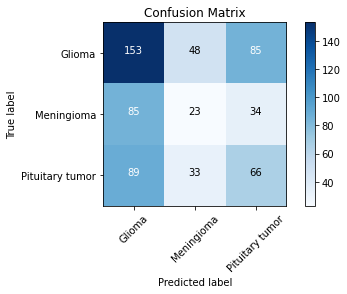

In [31]:
plot_confusion_matrix(cm=conf_matrix_cn, classes=CLASSES, title='Confusion Matrix')


In [21]:
from sklearn.metrics import plot_confusion_matrix


In [32]:
predictions = np.argmax(model.predict(test_set),axis=1)
labels = test_set.classes
predictions , labels

(array([0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 1,
        0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 1, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2,
        2, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0,
        0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 1, 2, 1,
        2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0,
        0, 0, 2, 0, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 2, 1, 0, 0, 0, 0, 1, 0,
        2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 0, 0, 0, 1,
        1, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
        0, 2, 0, 0, 1, 1, 2, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 0,
        0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 2, 1,
        2, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0,
        0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 

In [23]:
from sklearn.metrics import confusion_matrix

In [27]:

CLASSES = [ 'Glioma',
           'Meningioma',
           'Pituitary tumor',
            ]

In [ ]:
from matplotlib.pyplot import *


In [ ]:
from sklearn.metrics import plot_confusion_matrix


In [ ]:
def confusion_matrix_plot(matrix):
    plt.figure(figsize=(12,10))
    cmap = "YlGnBu"
    ax= plt.subplot()
    conf_matrix_cn.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=cmap);  #annot=True to annotate cells, ftm='g' to disable scientific notation
    #plt.savefig('/kaggle/working/img1.png')
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(CLASSES); 
    ax.yaxis.set_ticklabels(CLASSES[::-1]);
    plt.show()

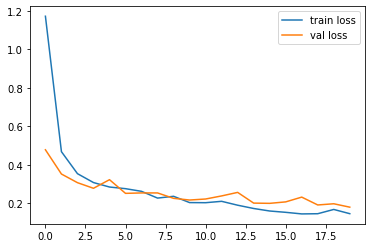

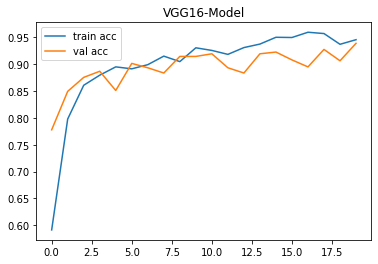

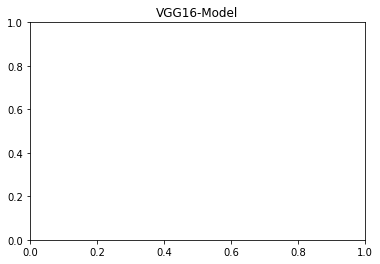

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
plt.title('VGG16-Model')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')
plt.title('VGG16-Model')
plt.show()

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')